### Task 3: Implementation and Visualisation of UNet3+

In [6]:
# Imports

import os
import imageio
import numpy as np
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

import torch
from torch.utils import data
from torchvision import transforms
import torch.nn as nn
import torchvision

from metrics import eval_metrics
from utils import save_checkpoint, load_checkpoint, weight_decay, visualize_data 
from model import UNet3Plus
from loader import cityscapesLoader
from train import train
from augmentations import Compose, RandomHorizontallyFlip, RandomRotate, RandomVerticallyFlip, RandomTranslate
from evaluate import evaluation, CE_loss
from result_visualization import result_vis

Get necessary data files. Only run this code once.

In [ ]:
#!wget --keep-session-cookies --save-cookies=cookies.txt --post-data 'username=username&password=password&submit=Login' https://www.cityscapes-dataset.com/login/

# !wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=3 # => leftImg8bit
# !wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=1 #=> gtFine

# !unzip gtFine_trainvaltest.zip
# !unzip leftImg8bit_trainvaltest.zip

In [14]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

torch.cuda.empty_cache()

import warnings
warnings.filterwarnings('ignore')

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

### 3.1 Define model architecture

In [3]:
model = UNet3Plus()

### 3.2 Hyperparameters

In [4]:
bs = 2
epochs = 10
lr = 1e-4

### 3.3 Dataset and Dataloader

In [7]:
# Insert your own data path
local_path = "/arja_raid/datasets/Cityscapes/"

augs = Compose([RandomRotate(10), RandomTranslate((0.1, 0.1)), RandomHorizontallyFlip(0.5)])

traindataset = cityscapesLoader(root=local_path, is_transform=True, split='train', augmentations=augs)
validdataset = cityscapesLoader(root=local_path, is_transform=True, split='val')

# dataloader variable
trainloader = data.DataLoader(traindataset, batch_size=bs, shuffle=True)
validloader = data.DataLoader(validdataset, batch_size=bs, shuffle=False)

Found 2975 train images
Found 500 val images


**Visualizing the Images and Ground Truths**

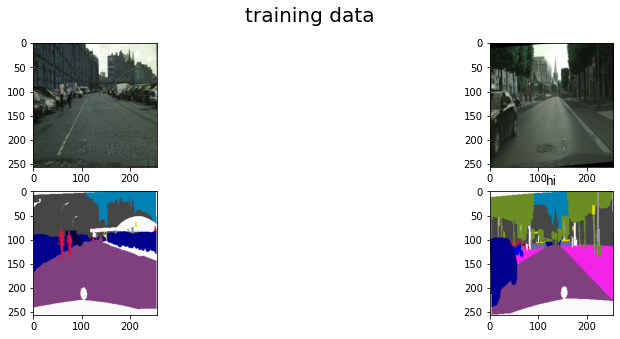

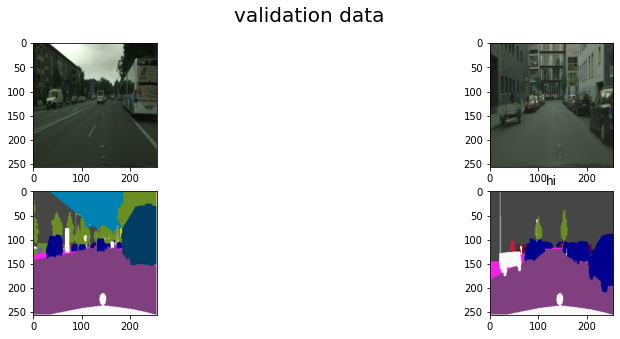

In [8]:
# Display training and validation data
num_vis_img = bs
visualize_data(num_vis_img, trainloader, traindataset, 'training data')
visualize_data(num_vis_img, validloader, validdataset, 'validation data')

### 3.4 Loss fuction and Optimizer

In [11]:
# loss function
loss_f = CE_loss

# optimizer variable
params = weight_decay(model, l2_value=0.0001)
opt = torch.optim.Adam(params, lr=lr)

### 3.5 Training the model

In [16]:
model.to(DEVICE)

UNet3Plus(
  (conv1): conv2(
    (conv1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (conv2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): conv2(
    (conv1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (conv2): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, tr

In [17]:
criterion = loss_f
history = train(traindataset, validdataset, trainloader, validloader, model, criterion, opt, epochs)

Epoch 1: 100%|██████████| 992/992 [41:06<00:00,  2.49s/batch, loss=1.83]
Validation Epoch 1: : 167it [02:36,  1.07it/s, loss=2.98]                       


=> Saving checkpoint


Epoch 2: 100%|██████████| 992/992 [41:55<00:00,  2.54s/batch, loss=1.47]
Validation Epoch 2: : 167it [02:33,  1.09it/s, loss=3.13]                       


=> Saving checkpoint


Epoch 3: 100%|██████████| 992/992 [41:24<00:00,  2.50s/batch, loss=1.1] 
Validation Epoch 3: : 167it [02:34,  1.08it/s, loss=3.05]                       


=> Saving checkpoint


Epoch 4: 100%|██████████| 992/992 [41:00<00:00,  2.48s/batch, loss=1.15]
Validation Epoch 4: : 167it [02:32,  1.10it/s, loss=2.77]                       


=> Saving checkpoint


Epoch 5: 100%|██████████| 992/992 [41:10<00:00,  2.49s/batch, loss=0.914]
Validation Epoch 5: : 167it [02:34,  1.08it/s, loss=2.59]                       


=> Saving checkpoint


Epoch 6: 100%|██████████| 992/992 [41:14<00:00,  2.49s/batch, loss=1.86]
Validation Epoch 6: : 167it [02:34,  1.08it/s, loss=2.24]                        


=> Saving checkpoint


Epoch 7: 100%|██████████| 992/992 [40:58<00:00,  2.48s/batch, loss=2.37]
Validation Epoch 7: : 167it [02:35,  1.07it/s, loss=2.39]                       


=> Saving checkpoint


Epoch 8: 100%|██████████| 992/992 [43:15<00:00,  2.62s/batch, loss=1.06]
Validation Epoch 8: : 167it [02:41,  1.03it/s, loss=2.17]                        


=> Saving checkpoint


Epoch 9: 100%|██████████| 992/992 [42:46<00:00,  2.59s/batch, loss=2.02] 
Validation Epoch 9: : 167it [02:42,  1.03it/s, loss=2.08]                        


=> Saving checkpoint


Epoch 10: 100%|██████████| 992/992 [44:41<00:00,  2.70s/batch, loss=0.781]
Validation Epoch 10: : 167it [02:46,  1.00it/s, loss=2.09]                        


=> Saving checkpoint


**Observe the training and validation curves**

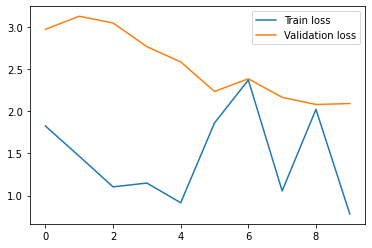

In [19]:
fig = plt.figure()
plt.plot(history[0])
plt.plot(history[1])
plt.legend(['Train loss', 'Validation loss'])
plt.show()
#fig.savefig('/s8awdesh/trained_models/Task3/Plots/train_loss_curve.png')

### 3.6 Evaluating the trained model

**Get average scores over the entire set**

In [10]:
checkpoint_path = "/arja_raid/trained_models/task3.pth.tar"
model = UNet3Plus()
model.to(DEVICE)
evaluation(checkpoint_path, validdataset, validloader, bs, model, DEVICE, num_classes=20)

=> Loading checkpoint


100%|██████████| 250/250 [04:05<00:00,  1.02it/s]

avg_jacc or iou: 0.2130135698914528,    avg_dice: 0.2594224343597889, f1_score: 0.2798401797884681,    accuracy: 0.2635921239852905, auc: 0.7742536949426534


(0.2130135698914528,
 0.2594224343597889,
 0.2798401797884681,
 tensor(0.2636),
 0.7742536949426534)

**Plot per epoch scores**

In [ ]:
iou_scores = []
dice_scores = []
f1_scores = []
acc_scores = []

for epoch in range(0,10):
    model = UNet3Plus()
    model.to(DEVICE)
    checkpoint_path = "/arja_raid/trained_models/Task3/task3_ep" + str(epoch) + ".pth.tar"
    iou_sc, dice_sc, f1_sc, acc_sc, auc_sc = evaluation(checkpoint_path, validdataset, validloader, bs, model, device, num_classes=20)
    iou_scores.append(iou_sc)
    dice_scores.append(dice_sc)
    f1_scores.append(f1_sc)
    acc_scores.append(acc_sc)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,4))
ax1.plot(iou_scores)
ax1.set_title("IOU")
ax2.plot(dice_scores)
ax2.set_title("Dice")
ax3.plot(f1_scores)
ax3.set_title("F1")
ax4.plot(accuracy)
ax4.set_title("Accuracy")
plt.show()

### 3.7 Visualize results

=> Loading checkpoint


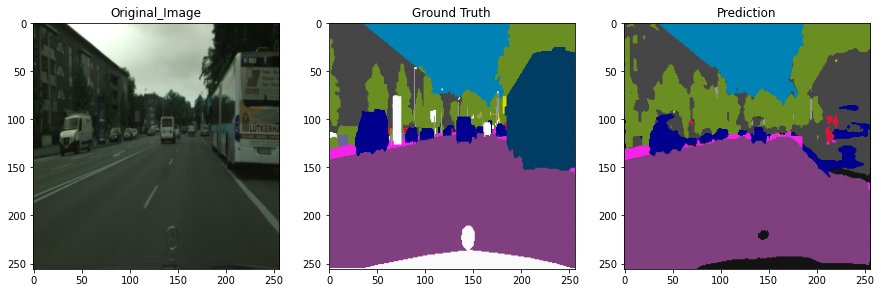

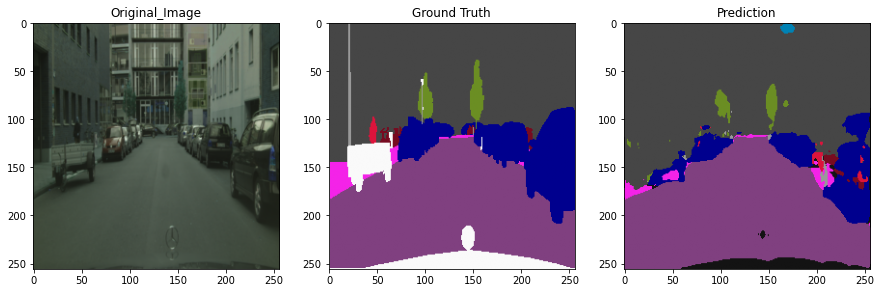

In [17]:
model = UNet3Plus()
model.to(DEVICE)
checkpoint_path = "/arja_raid/trained_models/task3.pth.tar"

result_vis(checkpoint_path, validdataset, validloader, bs, model, DEVICE)

---